In [11]:
import pandas as pd 
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Load and prepare data
path = "ETTh1.csv"
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.drop("Id", axis=1, inplace=True)
df = df.asfreq('H')
df = df.sort_index()
df.head()

,OT
date,
2016-07-01 00:00:00,30.531000
2016-07-01 01:00:00,27.787001
2016-07-01 02:00:00,27.787001
2016-07-01 03:00:00,25.044001
2016-07-01 04:00:00,21.948000


In [8]:
results_search = pd.read_csv("results_val.csv")
results_search.head(15)

,Unnamed: 0,lags,params,mean_absolute_error,n_estimators,max_depth,learning_rate,reg_alpha,reg_lambda
0,42,2880,"{'n_estimators': 800, 'max_depth': 6, 'learnin...",2.125747,800.0,6.0,0.063657,0.3,1.0
1,46,2880,"{'n_estimators': 800, 'max_depth': 6, 'learnin...",2.191437,800.0,6.0,0.062355,0.2,0.8
2,15,2880,"{'n_estimators': 900, 'max_depth': 6, 'learnin...",2.232195,900.0,6.0,0.013309,0.3,0.8
3,49,2880,"{'n_estimators': 800, 'max_depth': 6, 'learnin...",2.271540,800.0,6.0,0.038502,0.5,0.9
4,28,2880,"{'n_estimators': 1000, 'max_depth': 6, 'learni...",2.294565,1000.0,6.0,0.090127,0.6,0.8
5,43,2880,"{'n_estimators': 1000, 'max_depth': 6, 'learni...",2.310258,1000.0,6.0,0.062798,0.3,0.8
6,5,2880,"{'n_estimators': 1000, 'max_depth': 6, 'learni...",2.346478,1000.0,6.0,0.121849,0.3,0.6
7,45,2880,"{'n_estimators': 900, 'max_depth': 7, 'learnin...",2.358618,900.0,7.0,0.127467,0.1,0.6
8,34,2880,"{'n_estimators': 1100, 'max_depth': 5, 'learni...",2.375260,1100.0,5.0,0.010066,0.3,0.9
9,13,2880,"{'n_estimators': 800, 'max_depth': 6, 'learnin...",2.410578,800.0,6.0,0.018067,0.9,1.0


## Best model 

Our best model is the model in the __10'th__ row which corespondes to our "submission_10" submission and its predictios are located in the column __prediction_10__ in __predictions_all.csv__ 

__note__: somehow running the XGBOOST on cpu will change the model predictions and thus will result in different mea, to get the exact result that I had and submitted you have to run in on a cuda device (gpu).

In [9]:
row = results_search.iloc[10]
print(f" index: {row['Unnamed: 0']} params: ", row["params"])

 index: 36 params:  {'n_estimators': 1100, 'max_depth': 5, 'learning_rate': 0.04617887276102834, 'reg_alpha': 0.1, 'reg_lambda': 0.7000000000000001}


In [10]:
forecaster = ForecasterAutoreg(
             regressor = XGBRegressor(random_state=123,
                                      tree_method='hist',
                                      device='cuda', learning_rate= row["learning_rate"],
                                      max_depth	= int(row["max_depth"]), n_estimators = int(row["n_estimators"]),
                                      reg_alpha= row["reg_alpha"], 	reg_lambda = row["reg_lambda"]),
             lags            = int(row["lags"])  )

forecaster.fit(df["OT"])
predictions = forecaster.predict(100)

## Visualizng best model forecast 

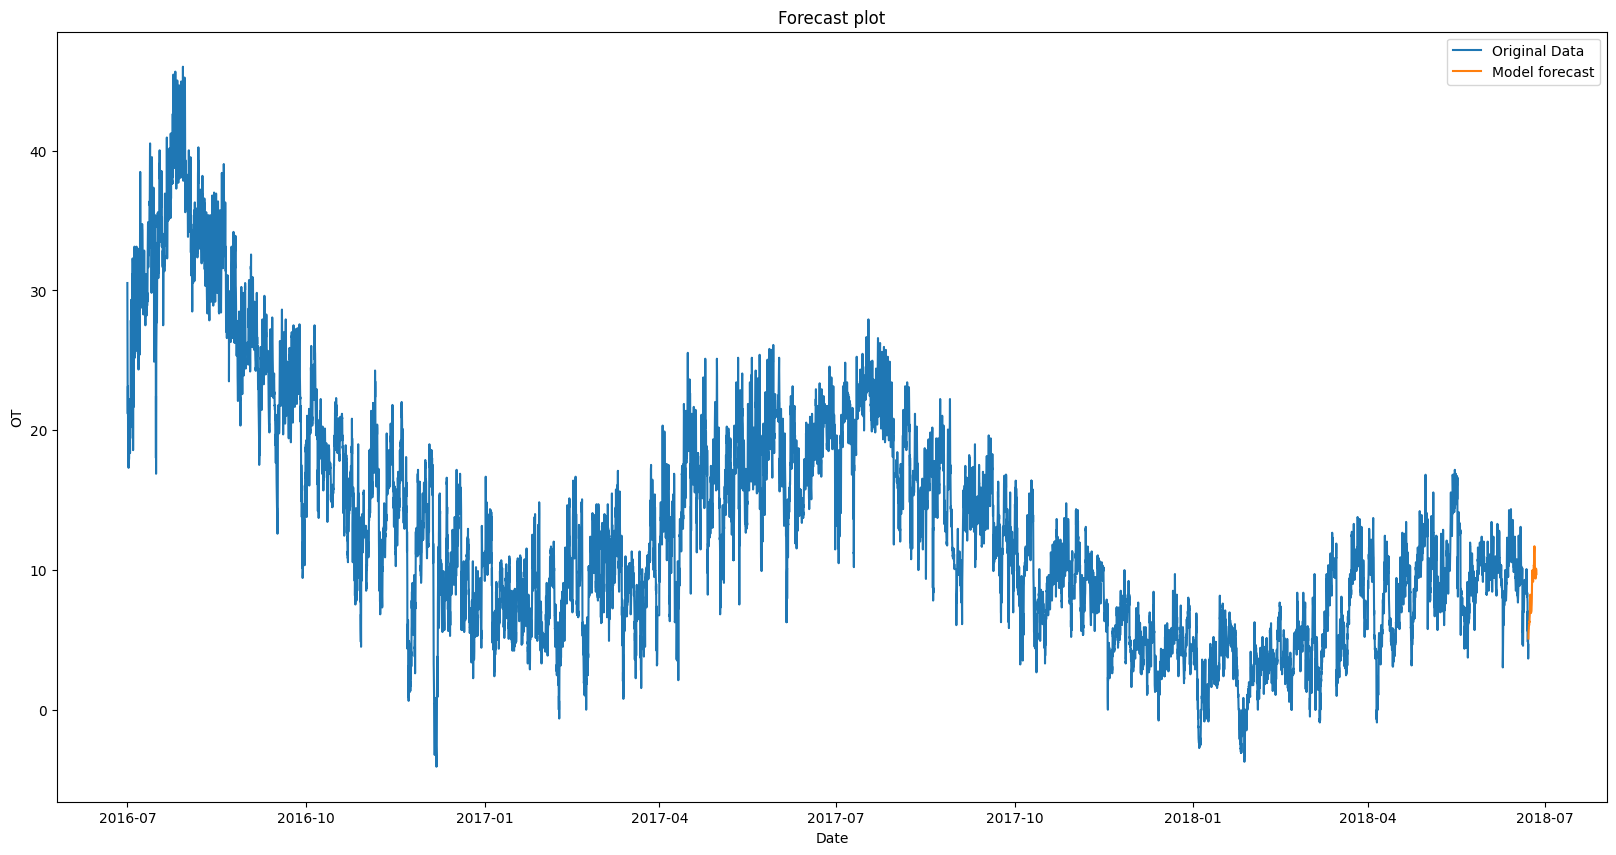

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(df["OT"], label='Original Data')
plt.plot(predictions, label='Model forecast')
plt.xlabel('Date')
plt.ylabel('OT')
plt.title('Forecast plot')
plt.legend()
plt.show()

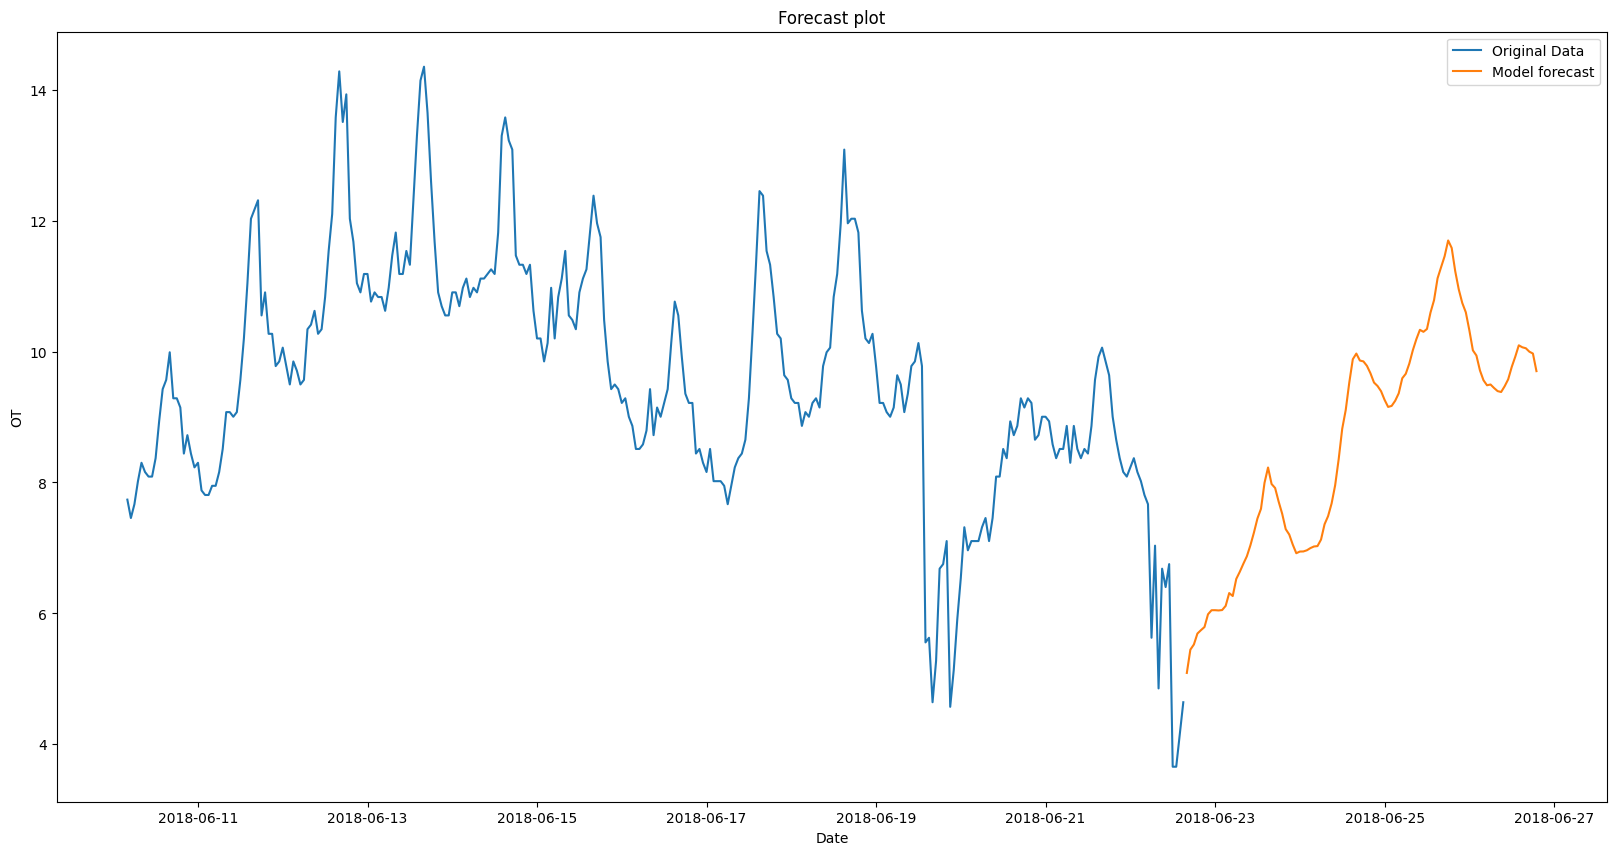

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[-300:]["OT"], label='Original Data')
plt.plot(predictions, label='Model forecast')
plt.xlabel('Date')
plt.ylabel('OT')
plt.title('Forecast plot')
plt.legend()
plt.show()